In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

In [8]:
mc=pd.read_csv('../Datasets/Mall_customers.csv')
mc

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
mc.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
scale=MinMaxScaler()
scale.fit(mc[['Annual Income (k$)']])
mc['Annual Income (k$)']=scale.transform(mc[['Annual Income (k$)']])
scale.fit(mc[['Spending Score (1-100)']])
mc['Spending Score (1-100)']=scale.transform(mc[['Spending Score (1-100)']])
scale.fit(mc[['Age']])
mc['Age']=scale.transform(mc[['Age']])
mc

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,0.000000,0.387755
1,2,Male,0.057692,0.000000,0.816327
2,3,Female,0.038462,0.008197,0.051020
3,4,Female,0.096154,0.008197,0.775510
4,5,Female,0.250000,0.016393,0.397959
...,...,...,...,...,...
195,196,Female,0.326923,0.860656,0.795918
196,197,Female,0.519231,0.909836,0.275510
197,198,Male,0.269231,0.909836,0.744898
198,199,Male,0.269231,1.000000,0.173469


In [13]:
X=mc.iloc[:,[3,4]].values
X

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

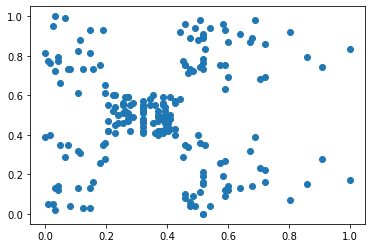

In [14]:
plt.scatter(X[:,0],X[:,1])
plt.show()

Text(0, 0.5, 'Clusters')

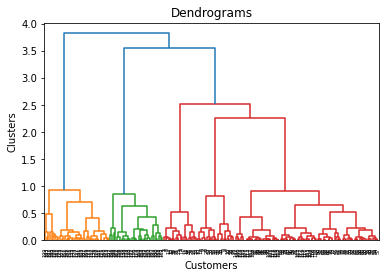

In [19]:
import scipy.cluster.hierarchy as hcs
# dendrogram= hcs.dendrogram.linkage(X,method='ward')
dendrogram=hcs.dendrogram(hcs.linkage(X,method='ward'))
plt.title("Dendrograms")
plt.xlabel("Customers")
plt.ylabel("Clusters")
# hc.dendrogram(hc.linkage(iris_X,method='centroid'))

In [30]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

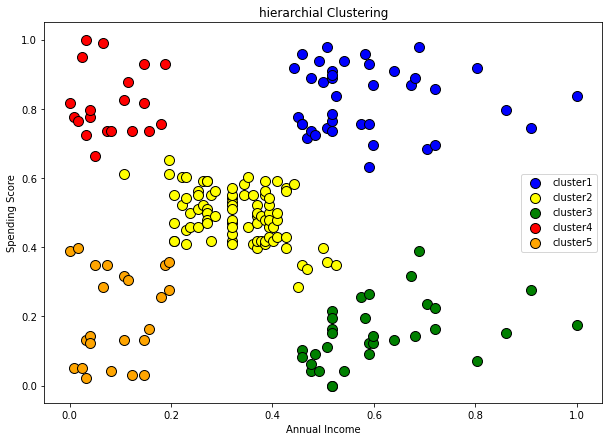

In [31]:
fig=plt.figure(figsize=(10,7))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='blue',label='cluster1',edgecolor='black')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='yellow',label='cluster2',edgecolor='black')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label='cluster3',edgecolor='black')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='red',label='cluster4',edgecolor='black')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='orange',label='cluster5',edgecolor='black')
plt.title("hierarchial Clustering")
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [27]:
# If the # cluster =3
# from sklearn.cluster import AgglomerativeClustering
# hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
# y_hc=hc.fit_predict(X)
# y_hc

In [28]:
# fig=plt.figure(figsize=(10,7))
# plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='blue',label='cluster1',edgecolor='black')
# plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='yellow',label='cluster2',edgecolor='black')
# plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label='cluster3',edgecolor='black')
# plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='red',label='cluster4',edgecolor='black')
# plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='orange',label='cluster5',edgecolor='black')
# plt.title("hierarchial Clustering")
# plt.xlabel('Annual Income')
# plt.ylabel('Spending Score')
# plt.legend()
# plt.show()

In [38]:
y=mc.iloc[:,[2,4]].values
y

array([[0.01923077, 0.3877551 ],
       [0.05769231, 0.81632653],
       [0.03846154, 0.05102041],
       [0.09615385, 0.7755102 ],
       [0.25      , 0.39795918],
       [0.07692308, 0.76530612],
       [0.32692308, 0.05102041],
       [0.09615385, 0.94897959],
       [0.88461538, 0.02040816],
       [0.23076923, 0.7244898 ],
       [0.94230769, 0.13265306],
       [0.32692308, 1.        ],
       [0.76923077, 0.14285714],
       [0.11538462, 0.7755102 ],
       [0.36538462, 0.12244898],
       [0.07692308, 0.79591837],
       [0.32692308, 0.34693878],
       [0.03846154, 0.66326531],
       [0.65384615, 0.28571429],
       [0.32692308, 0.98979592],
       [0.32692308, 0.34693878],
       [0.13461538, 0.73469388],
       [0.53846154, 0.04081633],
       [0.25      , 0.73469388],
       [0.69230769, 0.13265306],
       [0.21153846, 0.82653061],
       [0.51923077, 0.31632653],
       [0.32692308, 0.6122449 ],
       [0.42307692, 0.30612245],
       [0.09615385, 0.87755102],
       [0.

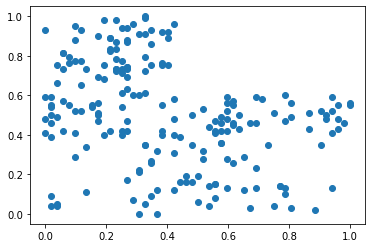

In [39]:
plt.scatter(y[:,0],y[:,1])
plt.show()

Text(0, 0.5, 'Clusters')

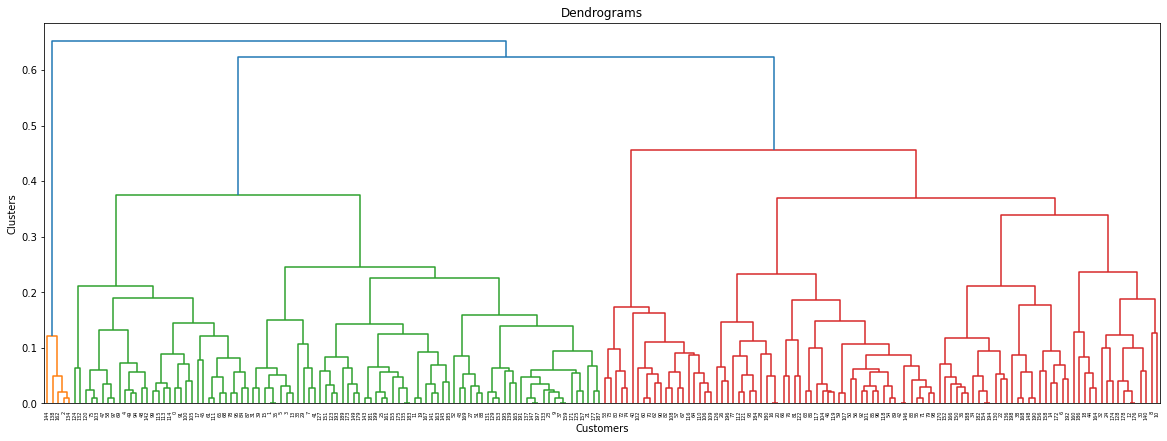

In [44]:
import scipy.cluster.hierarchy as sch
# dendrogram= hcs.dendrogram.linkage(X,method='ward')
plt.figure(figsize=(20,7))
dendrogram=sch.dendrogram(sch.linkage(y,method='average'))
plt.title("Dendrograms")
plt.xlabel("Customers")
plt.ylabel("Clusters")

In [46]:
from sklearn.cluster import AgglomerativeClustering
hc1=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
y_hc1=hc1.fit_predict(y)

In [49]:
hc1.labels_

array([0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 0, 1, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 0, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2,
       0, 2], dtype=int64)

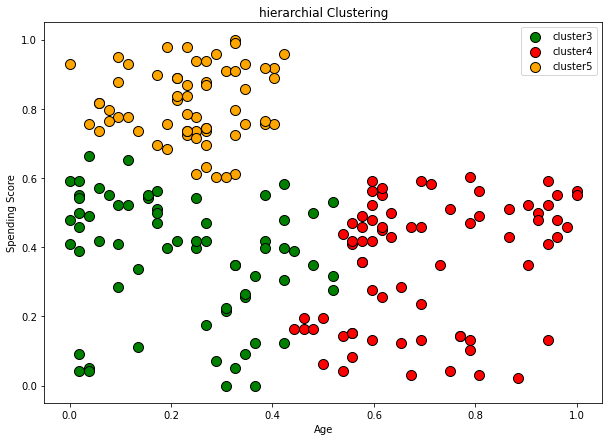

In [52]:
fig=plt.figure(figsize=(10,7))
plt.scatter(y[y_hc1==0,0],y[y_hc1==0,1],s=100,c='green',label='cluster3',edgecolor='black')
plt.scatter(y[y_hc1==1,0],y[y_hc1==1,1],s=100,c='red',label='cluster4',edgecolor='black')
plt.scatter(y[y_hc1==2,0],y[y_hc1==2,1],s=100,c='orange',label='cluster5',edgecolor='black')
plt.title("hierarchial Clustering")
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Text(0, 0.5, 'Clusters')

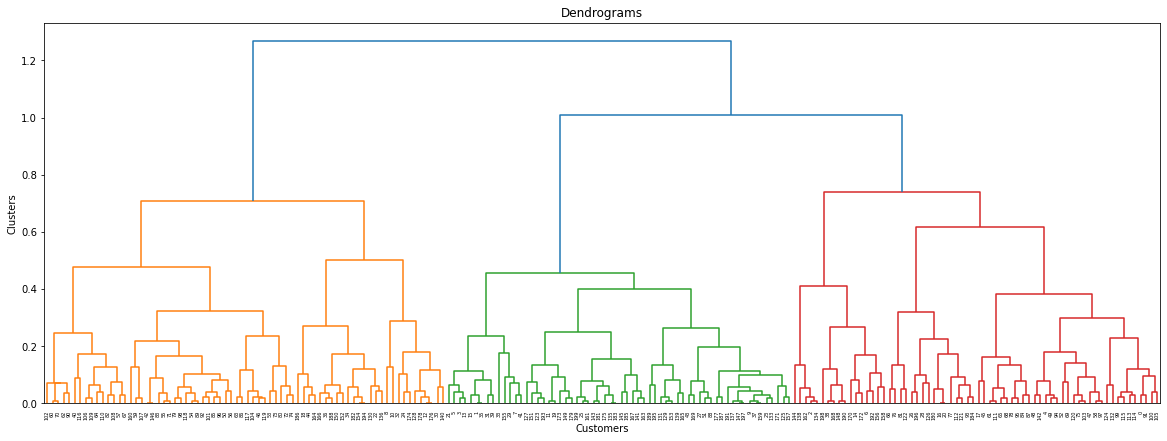

In [53]:
import scipy.cluster.hierarchy as sch
# dendrogram= hcs.dendrogram.linkage(X,method='ward')
plt.figure(figsize=(20,7))
dendrogram=sch.dendrogram(sch.linkage(y,method='complete'))
plt.title("Dendrograms")
plt.xlabel("Customers")
plt.ylabel("Clusters")